In [1]:
# setup
import pandas as pd
import matplotlib.pyplot as plt

import MyFunctions as f

In [2]:
train = pd.read_csv("data/aps_failure_training_set.csv")
test = pd.read_csv("data/aps_failure_test_set.csv")

In [3]:
# basic prepocessing
"""format classes as pos: 1, neg: 0
convert na in NaN values"""
train = f.data_prepro(train)
test = f.data_prepro(test)

In [4]:
# null values
"""drop features with more than t% of NaN on the trainset
fill the remaining nulls with the mean of the column"""
[y_train, X_train, y_test, X_test] = f.null_values(train, test, t=0.5)

In [5]:
# standarize
X_train, X_test = f.standardize(X_train, X_test)

In [6]:
# feature selection
X_train = f.feature_selection(X_train, y_train)
X_test = X_test[X_train.columns]

### Class distribution 2 most important features

In [7]:
def scatter_2features(X_train, y_train, title):
    d = {"class": y_train, "cn_001": X_train["cn_001"], "by_000": X_train["by_000"]}
    V = pd.DataFrame(d)
    
    Vcn_1 = V[V["class"] == 1]["cn_001"].values
    Vcn_0 = V[V["class"] == 0]["cn_001"].values

    Vby_1 = V[V["class"] == 1]["by_000"].values
    Vby_0 = V[V["class"] == 0]["by_000"].values
    
    # plot
    plt.scatter(Vcn_1, Vby_1, color = 'green') # minority class
    plt.scatter(Vcn_0, Vby_0 , color = 'black') # mayority class
    plt.xlabel("cn_001")
    plt.ylabel("by_000")
    plt.legend(('minority class', 'majority class'))
    plt.title(title)
    plt.savefig("figures/"+title+".png", bbox_inches = "tight")
    plt.show()

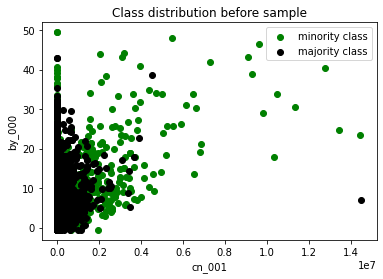

In [8]:
scatter_2features(X_train, y_train, "Class distribution before sample")

### PCA for Data Visualization

In [9]:
from sklearn.decomposition import PCA

In [10]:
def PCA_4vis(X_train, y_train, title):
    # PCA 2 components
    pca = PCA(n_components=2)
    pc = pca.fit_transform(X_train)
    
    # to dataframe
    pc_df = pd.DataFrame(data = pc, columns = ["pc1", "pc2"])
    pc_df["class"] = y_train
    pc_df = pc_df[["class", "pc1", "pc2"]]
    
    pc1_1 = pc_df[pc_df["class"] == 1]["pc1"].values
    pc1_0 = pc_df[pc_df["class"] == 0]["pc1"].values

    pc2_1 = pc_df[pc_df["class"] == 1]["pc2"].values
    pc2_0 = pc_df[pc_df["class"] == 0]["pc2"].values
    
    # plot
    plt.scatter(pc1_1, pc2_1, color = 'red') # minority class
    plt.scatter(pc1_0, pc2_0 , color = 'blue') # mayority class
    plt.xlabel("principal component 1")
    plt.ylabel("principal component 2")
    plt.legend(('minority class', 'majority class'))
    plt.title(title)
    plt.savefig("figures/"+title+".png", bbox_inches = "tight")
    plt.show()

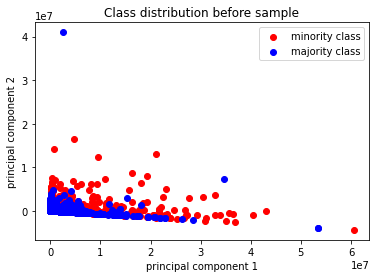

In [11]:
PCA_4vis(X_train, y_train, "Class distribution before sample")